In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

# Features
For the rest of the homework, you'll need to use only these columns:

Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg,
MSRP
# Data preparation
Select only the features from above and transform their names using the next line:
data.columns = data.columns.str.replace(' ', '_').str.lower()
Fill in the missing values of the selected features with 0.
Rename MSRP variable to price.

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [51]:
features = ['make', 'model', 'year', 'engine_hp','engine_cylinders', 'transmission_type', 'vehicle_style','highway_mpg', 'city_mpg']
data = df[features]

In [21]:
string = list(df.dtypes[df.dtypes == 'object'].index)

In [22]:
for col in string:
    df[col]= df[col].str.lower().str.replace(" ", "_")

In [23]:
df[features].dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [24]:
df[features].isnull().sum()
df[features] = df[features].fillna(0)

In [25]:
df[features].isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [27]:
df.rename(columns={'msrp': 'price'}, inplace=True)
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Question 1
What is the most frequent observation (mode) for the column transmission_type?

AUTOMATIC

In [28]:
df['transmission_type'].mode()

0    automatic
Name: transmission_type, dtype: object

In [29]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

# Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?
highway_mpg and city_mpg

In [30]:
df[features].columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [31]:
df[features].dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [36]:
numerical= ['year', 'engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg']
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

<AxesSubplot:>

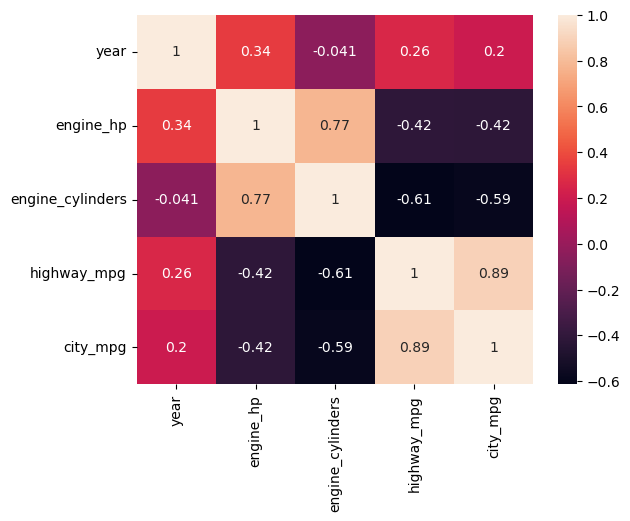

In [38]:
correlation = df[numerical].corr()
sns.heatmap(correlation, annot=True)

In [39]:
df[numerical].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


# Make price binary
Now we need to turn the price variable from numeric into a binary format.
Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.


In [52]:
df.price.mean()

40594.737032063116

In [43]:
above_average = (df.price >= df.price.mean()).astype(int)
above_average

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: price, Length: 11914, dtype: int32

In [57]:
data_copy = data.copy(deep=True)
data['above_average'] = (df.price > df.price.mean()).astype(int)
data.head()

C:\Users\linli\AppData\Local\Temp\ipykernel_51712\2732679092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['above_average'] = (df.price > df.price.mean()).astype(int)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [56]:
df[features]

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16


# Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (above_average) is not in your dataframe.

In [58]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [59]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [60]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [61]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [62]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

# Question 3
Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the lowest mutual information score?

transmission_type


In [63]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int32
dtype: object

In [64]:
categorical = [
    'make',
    'model',
    'transmission_type',
    'vehicle_style'
]

In [65]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return round(mutual_info_score(series, df_full_train.above_average), 2)

In [66]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

# Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.95

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
train_dicts[0]

{'make': 'mitsubishi',
 'model': 'endeavor',
 'transmission_type': 'automatic',
 'vehicle_style': '4dr_suv',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [71]:
#X_train and X_val
dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [74]:
from sklearn.metrics import accuracy_score

In [76]:
y_pred = model.predict(X_val)
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.94


# Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

year

In [77]:
features = categorical + numerical
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [78]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
orig_score = accuracy
difference = []

for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    difference.append(orig_score - score)
    print(c, orig_score - score, score)

make -0.002089802769618232 0.9420898027696182
model 0.018892152748636093 0.9211078472513639
transmission_type -0.0012505245488879657 0.9412505245488879
vehicle_style 0.0033655056651279436 0.936634494334872
year -0.008384389425094452 0.9483843894250944
engine_hp 0.018892152748636093 0.9211078472513639
engine_cylinders -0.002089802769618232 0.9420898027696182
highway_mpg -0.002089802769618232 0.9420898027696182
city_mpg -0.006705832983634141 0.9467058329836341


In [79]:
difference.sort()
print(difference)

[-0.008384389425094452, -0.006705832983634141, -0.002089802769618232, -0.002089802769618232, -0.002089802769618232, -0.0012505245488879657, 0.0033655056651279436, 0.018892152748636093, 0.018892152748636093]


# Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn.
We'll need to use the original column price. Apply the logarithmic transformation to this column.
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

0

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

data_copy.price = np.log1p(data_copy.price)

df_full_train, df_test = train_test_split(data_copy, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    model = Ridge(solver='sag', random_state=42, alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = round(mean_squared_error(y_val, y_pred), 3)